In [229]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt

In [230]:
def load_results(algorithm, env, seeds, algo_name=None):
    base_path = f"results/{algorithm}_{env}"
    results = []
    evals = []
    for seed in seeds:
        perf_path = list(Path(f"{base_path}/{seed}").glob('*'))[0]/"performance.csv"
        perf = pd.read_csv(perf_path)
        perf['seed'] = seed
        if algo_name is not None:
            perf['algorithm'] = algo_name
        else:
            perf['algorithm'] = algorithm
        perf['env'] = env   
        eval_path = list(Path(f"{base_path}/{seed}").glob('*'))[0]/"evaluation.csv"
        eval = pd.read_csv(eval_path)
        eval['seed'] = seed
        if algo_name is not None:
            eval['algorithm'] = algo_name
        else:
            eval['algorithm'] = algorithm
        eval['env'] = env
        results.append(perf)
        evals.append(eval)
    return pd.concat(results), pd.concat(evals)

In [231]:
def load_smac_results(algorithm, env, seeds, algo_name=None):
    base_path = f"results/{algorithm}_{env}"
    results = []
    evals = []
    td_errors = []
    for seed in seeds:
        perf_path = list(Path(f"{base_path}/{seed}").glob('*'))[0]/"results.csv"
        perf = pd.read_csv(perf_path)
        perf['seed'] = seed
        if algo_name is not None:
            perf['algorithm'] = algo_name
        else:
            perf['algorithm'] = algorithm
        perf['env'] = env   
        eval_path = list(Path(f"{base_path}/{seed}").glob('*'))[0]/"full_evals.csv"
        eval = pd.read_csv(eval_path)
        eval['seed'] = seed
        if algo_name is not None:
            eval['algorithm'] = algo_name
        else:
            eval['algorithm'] = algorithm
        eval['env'] = env
        td_path = list(Path(f"{base_path}/{seed}").glob('*'))[0]/"td_errors.csv"
        td = pd.read_csv(td_path)
        td['seed'] = seed
        if algo_name is not None:
            td['algorithm'] = algo_name
        else:
            td['algorithm'] = algorithm
        td['env'] = env
        results.append(perf)
        evals.append(eval)
        td_errors.append(td)
    full_evals = pd.concat(evals)
    td_errors = pd.concat(td_errors)
    return pd.concat(results), pd.merge(full_evals, td_errors, on=['seed', 'algorithm', 'env', 'config_id', 'iteration'])

In [232]:
def load_pbt_results(algorithm, env, seeds, algo_name=None):
    base_path = f"results/{algorithm}_{env}"
    results = []
    for seed in seeds:
        perf_path = Path(f"{base_path}/{seed}")/"runhistory.csv"
        perf = pd.read_csv(perf_path, index_col=False)
        perf['seed'] = seed
        if algo_name is not None:
            perf['algorithm'] = algo_name
        else:
            perf['algorithm'] = algorithm
        perf['env'] = env   
        results.append(perf)
    return pd.concat(results)

In [233]:
env = "CartPole-v1"
#env = "MiniGrid-DoorKey-5x5"

In [234]:
dqn_results, dqn_evals = load_results("dqn", env, range(0, 10))
#reset_results, reset_evals = load_results("redo_dqn", "CartPole-v1", range(0, 10), "reset_with_refit_0.001")
#reset_001_results, reset_001_evals = load_results("reset_001_dqn", "CartPole-v1", range(0, 10), "reset_with_refit_0.01")
#reset_00001_results, reset_00001_evals = load_results("reset_00001_dqn", "CartPole-v1", range(0, 10), "reset_with_refit_0.0001")
reset_no_refit_results, reset_no_refit_evals = load_results("reset_dqn", env, range(0, 10))
#full_results = pd.concat([dqn_results, reset_results, reset_no_refit_results, reset_00001_results])
#full_evals = pd.concat([dqn_evals, reset_evals, reset_no_refit_evals, reset_00001_evals])

In [235]:
pbt_results = load_pbt_results("pbt", env, range(0, 10))
pbt_results["performance"] = -1 * pbt_results["performance"]
pbt_results["iteration"] = pbt_results["iteration"]*max(dqn_evals["steps"])/max(pbt_results["iteration"])

pb2_results = load_pbt_results("pb2", env, range(0, 10))
pb2_results["performance"] = -1 * pb2_results["performance"]
pb2_results["iteration"] = pb2_results["iteration"]*max(dqn_evals["steps"])/max(pb2_results["iteration"])

/var/folders/yc/_2wjgdhd4px91396bq5wm7kr0000gn/T/ipykernel_54950/752541557.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  perf = pd.read_csv(perf_path, index_col=False)
/var/folders/yc/_2wjgdhd4px91396bq5wm7kr0000gn/T/ipykernel_54950/752541557.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  perf = pd.read_csv(perf_path, index_col=False)
/var/folders/yc/_2wjgdhd4px91396bq5wm7kr0000gn/T/ipykernel_54950/752541557.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  perf = pd.read_csv(perf_path, index_col=False)
/var/folders/yc/_2wjgdhd4px91396bq5wm7kr0000gn/T/ipykernel_54950/752541557.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  perf = pd.read_csv(perf_path, index

In [236]:
rbt_perf, rbt_evals = load_smac_results("rbt", env, range(0, 10))
rbt_perf["incumbent_performance"] = rbt_perf["incumbent_performance"]*-1
rbt_perf["iteration"] = rbt_perf["iteration"]*max(dqn_evals["steps"])/max(rbt_perf["iteration"])
rbt_evals["full_eval_performance"] = rbt_evals["full_eval_performance"]*-1

rbt_eta2_perf, rbt_eta2_evals = load_smac_results("rbt_eta2", env, range(0, 10))
rbt_eta2_perf["incumbent_performance"] = rbt_eta2_perf["incumbent_performance"]*-1
rbt_eta2_perf["iteration"] = rbt_eta2_perf["iteration"]*max(dqn_evals["steps"])/max(rbt_eta2_perf["iteration"])
rbt_eta2_evals["full_eval_performance"] = rbt_eta2_evals["full_eval_performance"]*-1

rbt_td_perf, rbt_td_evals = load_smac_results("rbt_td", env, range(0, 10))
rbt_td_perf["incumbent_tds"] = rbt_td_perf["incumbent_performance"]
rbt_td_perf["incumbent_performance"] = rbt_td_evals[rbt_td_evals["td_error"].isin(rbt_td_evals.groupby(by=["seed", "iteration"])["td_error"].min())]["full_eval_performance"].abs().values
rbt_td_perf["iteration"] = rbt_td_perf["iteration"]*max(dqn_evals["steps"])/max(rbt_td_perf["iteration"])

<Axes: xlabel='steps', ylabel='returns'>

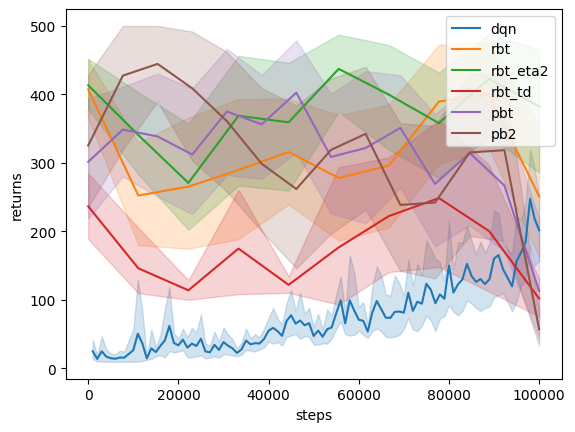

In [241]:
sns.lineplot(data=dqn_evals, x="steps", y="returns", label="dqn")
#sns.lineplot(data=reset_no_refit_evals, x="steps", y="returns", label="reset_no_refit")
sns.lineplot(data=rbt_perf, x="iteration", y="incumbent_performance", label="rbt")
sns.lineplot(data=rbt_eta2_perf, x="iteration", y="incumbent_performance", label="rbt_eta2")
sns.lineplot(data=rbt_td_perf, x="iteration", y="incumbent_performance", label="rbt_td")
sns.lineplot(data=pbt_results.groupby(by=["iteration", "seed"]).max().reset_index(), x="iteration", y="performance", label="pbt")
sns.lineplot(data=pb2_results.groupby(by=["iteration", "seed"]).max().reset_index(), x="iteration", y="performance", label="pb2")

<Axes: xlabel='iteration', ylabel='full_eval_performance'>

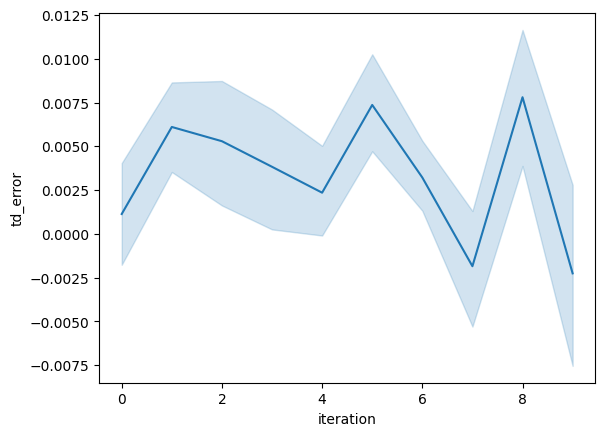

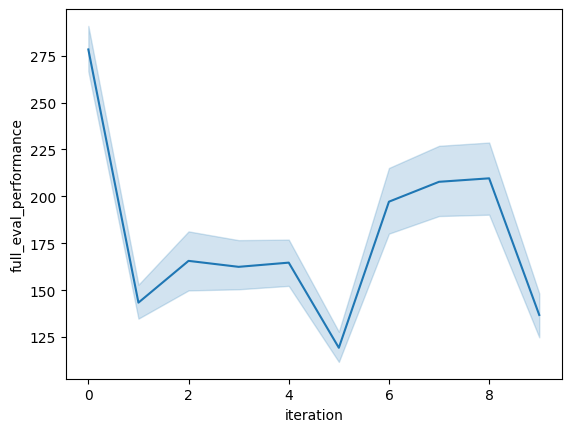

In [238]:
sns.lineplot(data=rbt_evals, x="iteration", y="td_error")
plt.figure()
sns.lineplot(data=rbt_evals, x="iteration", y="full_eval_performance")

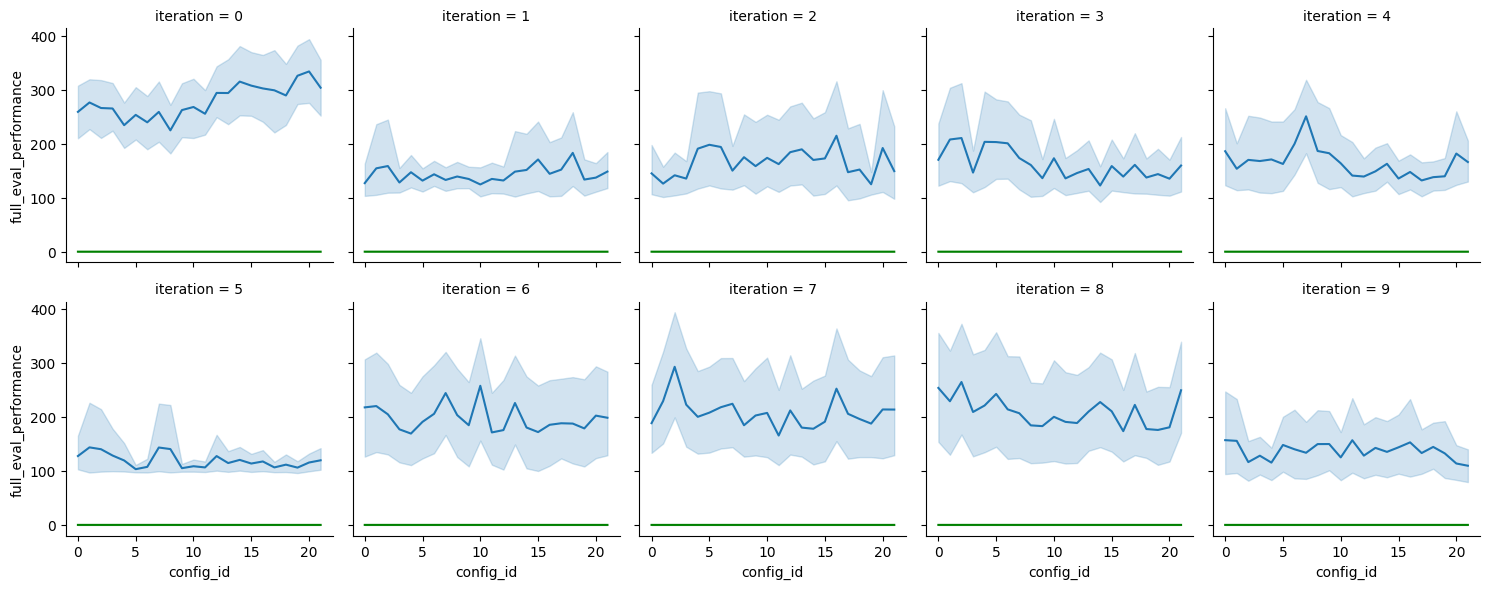

In [239]:
sns.FacetGrid(data=rbt_evals, col="iteration", col_wrap=5).map(sns.lineplot, "config_id", "td_error", color="green").map(sns.lineplot, "config_id", "full_eval_performance")

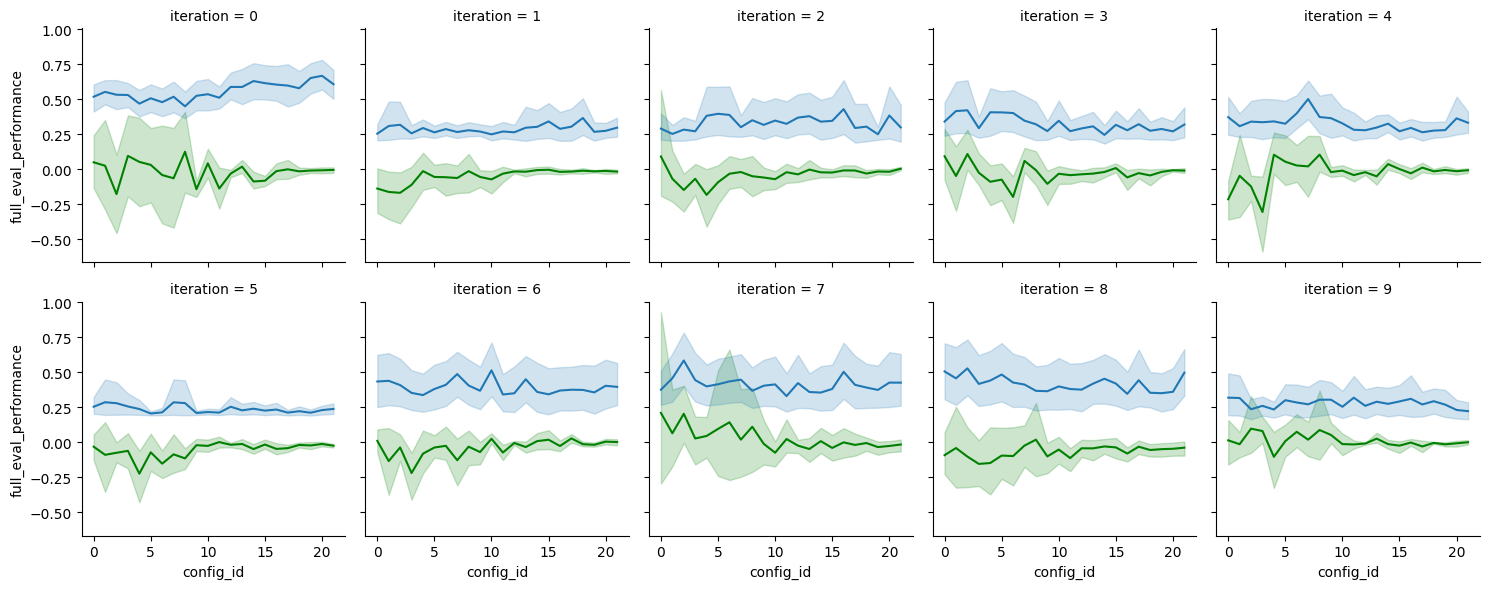

In [240]:
normalized_rbt_evals = rbt_evals.copy()
normalized_rbt_evals["td_error"] = -rbt_evals["td_error"]/rbt_evals.groupby("iteration")["td_error"].transform("max")
normalized_rbt_evals["full_eval_performance"] = rbt_evals["full_eval_performance"]/rbt_evals.groupby("iteration")["full_eval_performance"].transform("max")
sns.FacetGrid(data=normalized_rbt_evals, col="iteration", col_wrap=5).map(sns.lineplot, "config_id", "td_error", color="green").map(sns.lineplot, "config_id", "full_eval_performance")